<a href="https://colab.research.google.com/github/Rachhh53/MSDS-460-Decision-Analytics/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pulp

     |████████████████████████████████| 14.2 MB 25.5 MB/s 


In [2]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Setting up libcolamd2:amd64 (1:5.1.2-2) ...
Setting up libamd2:amd64 

In [3]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK

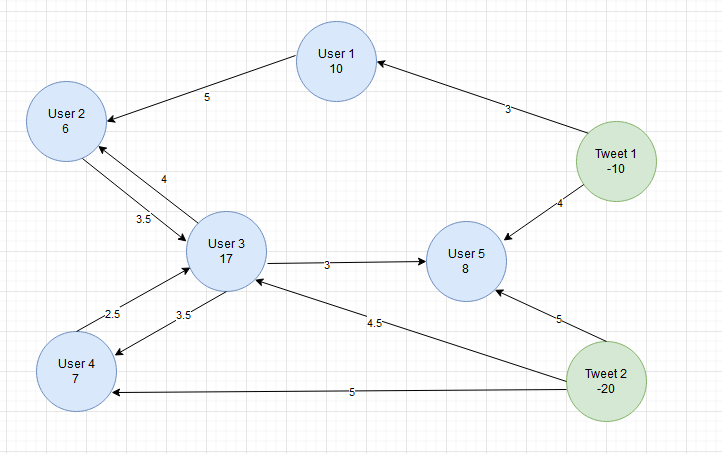


-20 momentum based on emotional words. This assumes Tweets have a finite amount of momentum to burn before the message is no longer interesting or has reached it's entire potential audience based on user activity.

Each user in the network takes momentum from the tweet based on the potential to spread that message. E.g. a  lower node value = tweet can be seen by more users because the message retains momentum. Just like with a message, a users momentum can also be exhausted (fulfilled) because users who tweet too often can get annoying to their followers and momentum drops to 0.

An edge value is what we're minimizing - a message wants to do the least amount of work possible to fulfill its momentum. An edge with a low value means the user is more likely to share a message.

This says that a Tweet could start with a super charged message with a lot of momentum, but if it doesn't get to the right users/network (only goes to nodes with high values that suck up all the tweets momentum), then it isn't very influential. However, a supercharged emotional message with users in its network with high momentum (low node values) will amplify that message and more users will have the potential to see that message before it runs its course.

It is likely that two users who follow each other enjoy the messages each other post. The flow of the message is adjusted for this kind of relationship based on the sentiment of each user. This is not necessarily a symmetrical relationship because one user might like the content of the other user more.

In [4]:
# define variables
T1U1 = LpVariable("T1U1", 0, None) # Tweet 1 to User 1
U1U2 = LpVariable("U1U2", 0, None) # User 1 to User 2
U2U3 = LpVariable("U2U3", 0, None) # User2 to User 3
U3U4 = LpVariable("U3U4", 0, None) # User3 to User 4
U3U5 = LpVariable("U3U5", 0, None) # User 3 to User 5
T2U5 = LpVariable("T2U5", 0, None) # Tweet 2 to User 5
T2U3 = LpVariable("T2U3", 0, None) # Tweet 2 to User 3
T2U4 = LpVariable("T2U4", 0, None) # Tweet 2 to User 4
U4U3 = LpVariable("U4U3", 0, None) # User 4 to User 3
U3U2 = LpVariable("U3U2", 0, None) # User 3 to User 2
T1U5 = LpVariable("T1U5", 0, None) # Tweet 1 to User 5

In [5]:
# defines the problem
prob = LpProblem("problem", LpMinimize)

In [6]:
# define constraints
prob += T1U1 == 10
prob += U1U2+U3U2-U2U3 == 6
prob += U2U3+U4U3+T2U3-U3U2-U3U4-U3U5 == 17
prob += U3U4+T2U4-U4U3 == 7
prob += T1U5+U3U5+T2U5 == 8
prob += T1U1+T1U5 <= 10
prob += T2U5+T2U3+T2U4 <= 20

In [7]:
# define objective function
prob += 3*T1U1+5*U1U2+3.5*U2U3+4*U3U2+3.5*U3U4+2.5*U4U3+3*U3U5+4*T1U5+5*T2U5+4.5*T2U3+5*T2U4
prob

problem:
MINIMIZE
3*T1U1 + 4*T1U5 + 4.5*T2U3 + 5*T2U4 + 5*T2U5 + 5*U1U2 + 3.5*U2U3 + 4*U3U2 + 3.5*U3U4 + 3*U3U5 + 2.5*U4U3 + 0.0
SUBJECT TO
_C1: T1U1 = 10

_C2: U1U2 - U2U3 + U3U2 = 6

_C3: T2U3 + U2U3 - U3U2 - U3U4 - U3U5 + U4U3 = 17

_C4: T2U4 + U3U4 - U4U3 = 7

_C5: T1U5 + T2U5 + U3U5 = 8

_C6: T1U1 + T1U5 <= 10

_C7: T2U3 + T2U4 + T2U5 <= 20

VARIABLES
T1U1 Continuous
T1U5 Continuous
T2U3 Continuous
T2U4 Continuous
T2U5 Continuous
U1U2 Continuous
U2U3 Continuous
U3U2 Continuous
U3U4 Continuous
U3U5 Continuous
U4U3 Continuous

In [8]:
# solve the problem
prob.writeLP("prob.lp")
prob.solve(GLPK(options=['--ranges', 'prob.sen']))
print ("Status:", LpStatus[prob.status])

Status: Optimal


In [9]:
# Note, we are only able to get sensitivity information because we are solving
# as a linear program.  If we solved as an Integer Program, then no 
# sensitivity information would be available.

for v in prob.variables():
    print(v.name, "=", v.varValue)

print ("Objective", value(prob.objective))
print ("")

T1U1 = 10.0
T1U5 = 0.0
T2U3 = 5.0
T2U4 = 7.0
T2U5 = 8.0
U1U2 = 18.0
U2U3 = 12.0
U3U2 = 0.0
U3U4 = 0.0
U3U5 = 0.0
U4U3 = 0.0
Objective 259.5

